In [1]:
"""import pandas as pd
ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)
ri.set_index('stop_datetime', inplace=True)"""

'import pandas as pd\nri = pd.read_csv(\'RI_cleaned.csv\', nrows=50000)\ndrop_columns=["state", "county_name", "county_fips", "fine_grained_location"]\nri.drop(drop_columns, axis=\'columns\', inplace=True)\nri.dropna(subset=[\'driver_gender\'], inplace=True)\nri[\'is_arrested\'] = ri.is_arrested.astype(\'bool\')\ncombined = ri.stop_date.str.cat(ri.stop_time, sep=\' \')\nri[\'stop_datetime\'] = pd.to_datetime(combined)\nri.drop(["stop_date", "stop_time"], axis=\'columns\', inplace=True)\nri.set_index(\'stop_datetime\', inplace=True)'

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

In [1]:
import pandas as pd
ri = pd.read_csv("police.csv_1.jptr sonu.csv", index_col =0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ri

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 11:30,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone X1
2005-01-04 12:55,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA


**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [3]:
ri["violation"].shape

(509681,)

In [4]:
ri["violation"].isnull().sum()

29073

In [5]:
ri["violation"]

stop_datetime
2005-01-02 01:55     Speeding
2005-01-02 20:30     Speeding
2005-01-04 11:30          NaN
2005-01-04 12:55    Equipment
2005-01-06 01:30    Equipment
                      ...    
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
Name: violation, Length: 509681, dtype: object

In [6]:
from collections import Counter

In [7]:
ri["violation"]

stop_datetime
2005-01-02 01:55     Speeding
2005-01-02 20:30     Speeding
2005-01-04 11:30          NaN
2005-01-04 12:55    Equipment
2005-01-06 01:30    Equipment
                      ...    
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
nan nan                   NaN
Name: violation, Length: 509681, dtype: object

In [8]:
bos_liste=[]

In [9]:
unique_alues = ri["violation"].apply(lambda x :bos_liste.append(x))

In [10]:
unique = Counter(bos_liste)

In [11]:
unique

Counter({'Speeding': 268744,
         nan: 29073,
         'Equipment': 61252,
         'Other': 24221,
         'Moving violation': 90234,
         'Registration/plates': 19830,
         'Seat belt': 16327})

In [12]:
deneme = ri["violation"].nunique()
deneme

6

In [13]:
aa = ri["violation"].value_counts(dropna=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF37250AC8>],
      dtype=object)

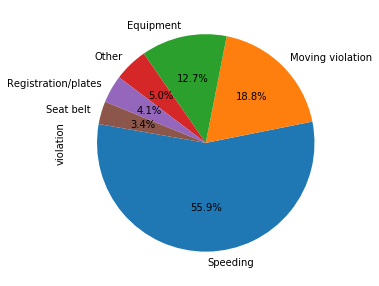

In [14]:
aa.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

In [15]:
###Express the violation counts as proportions of the total.

In [16]:
a =list(unique)
b =[]
for i in unique.values():
    b.append(i)
    
a

['Speeding',
 nan,
 'Equipment',
 'Other',
 'Moving violation',
 'Registration/plates',
 'Seat belt']

In [17]:
del a[1]

In [18]:
del b[1]

In [19]:
a

['Speeding',
 'Equipment',
 'Other',
 'Moving violation',
 'Registration/plates',
 'Seat belt']

In [20]:
b

[268744, 61252, 24221, 90234, 19830, 16327]

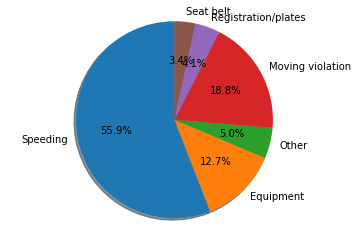

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

labels=a
sizes=b
explode = (0,0,0,0, 0, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [22]:
ri

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 11:30,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone X1
2005-01-04 12:55,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA


In [23]:
female= ri[ri["driver_gender"] == "F"]


In [24]:
male = ri[ri["driver_gender"] == "M"]

In [25]:
Counter(female["driver_gender"])

Counter({'F': 131138})

In [26]:
Counter(male["driver_gender"])

Counter({'M': 349446})

In [27]:
Counter(ri["driver_gender"])

Counter({'M': 349446, nan: 29097, 'F': 131138})

In [28]:
kadın_erkek_oranı = ri["driver_gender"].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3F741CC8>],
      dtype=object)

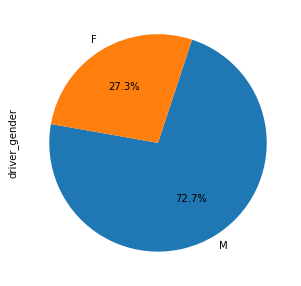

In [29]:
kadın_erkek_oranı.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

In [30]:
kadın_viplation_dagılımı = female["violation"].value_counts()
kadın_viplation_dagılımı

Speeding               86198
Moving violation       17911
Equipment              14039
Registration/plates     5649
Other                   3791
Seat belt               3550
Name: violation, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3FBD3148>],
      dtype=object)

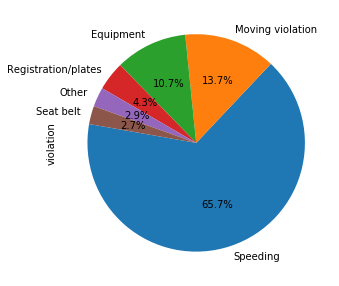

In [31]:
kadın_viplation_dagılımı.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)


In [32]:
erkek_violation_dagılım = male["violation"].value_counts()
erkek_violation_dagılım

Speeding               182538
Moving violation        72317
Equipment               47211
Other                   20425
Registration/plates     14181
Seat belt               12774
Name: violation, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3FC3EB88>],
      dtype=object)

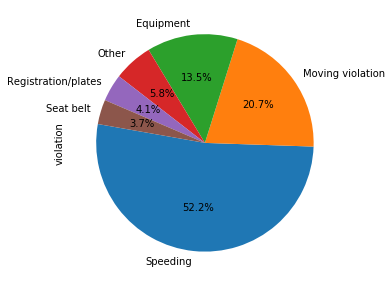

In [33]:
erkek_violation_dagılım.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

In [34]:
erkek_violation_dagılım[[0]]


Speeding    182538
Name: violation, dtype: int64

In [35]:
kadın_viplation_dagılımı[["Speeding"]]

Speeding    86198
Name: violation, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3FCA5148>],
      dtype=object)

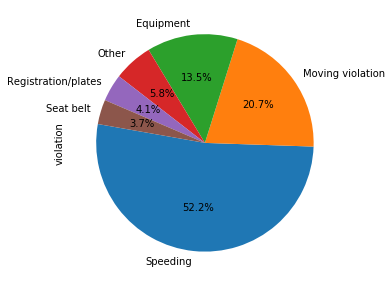

In [36]:
erkek_violation_dagılım.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

In [37]:
qq =pd.DataFrame({"Speeding":[86198, 182538]}, index=["F","M"])

In [38]:
qq

,Speeding
F,86198
M,182538


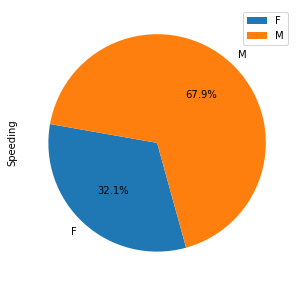

In [39]:
speed_f_m = qq.plot.pie( subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

***

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [40]:
male
female

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20,RI-2005-00016,2005-02-24,01:20,Zone X3,200,F,1983.0,22.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00,RI-2005-00019,2005-03-14,10:00,Zone K3,300,F,1984.0,21.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20,RI-2005-00026,2005-03-29,23:20,Zone K3,300,F,1971.0,34.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20,RI-2005-00035,2005-06-06,13:20,Zone X4,500,F,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30,RI-2005-00037,2005-06-18,16:30,Zone X4,500,F,1964.0,41.0,W,White,...,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:59,RI-2015-47051,2015-12-31,21:59,Zone K3,300,F,1994.0,21.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2015-12-31 22:09,RI-2015-47054,2015-12-31,22:09,Zone K3,300,F,1992.0,23.0,H,Hispanic,...,False,NaN,NaN,False,Warning,False,0-15 Min,False,False,Zone K3
2015-12-31 22:10,RI-2015-47055,2015-12-31,22:10,Zone X4,300,F,1989.0,26.0,L,Hispanic,...,False,NaN,NaN,False,Warning,False,0-15 Min,False,False,Zone X4


In [41]:
ri["stop_outcome"].value_counts()

Citation            428388
Warning              28849
Arrest Driver        14630
N/D                   3431
No Action             3337
Arrest Passenger      1973
Name: stop_outcome, dtype: int64

In [42]:
male["violation"] == "Speeding"

stop_datetime
2005-01-02 01:55     True
2005-01-02 20:30     True
2005-01-04 12:55    False
2005-01-06 01:30    False
2005-01-12 08:05    False
                    ...  
2015-12-31 22:46     True
2015-12-31 22:47    False
2015-12-31 23:08    False
2015-12-31 23:44     True
2015-12-31 23:48    False
Name: violation, Length: 349446, dtype: bool

In [43]:
male_and_speeding = male[male["violation"] == "Speeding"]

In [44]:
female_and_speeding =female[female["violation"] == "Speeding"]

In [45]:
male_and_speeding["stop_outcome"].value_counts()

Citation            172432
Warning               6587
Arrest Driver         2878
Arrest Passenger       231
N/D                    216
No Action              194
Name: stop_outcome, dtype: int64

In [46]:
male_and_speeding["stop_outcome"].count()

182538

In [47]:
female_and_speeding["stop_outcome"].value_counts()

Citation            82168
Warning              3362
Arrest Driver         456
Arrest Passenger       89
N/D                    78
No Action              45
Name: stop_outcome, dtype: int64

In [48]:
female_and_speeding["stop_outcome"].count()

86198

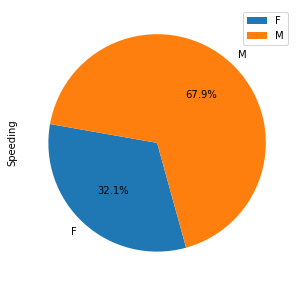

In [49]:
speed_f_m = qq.plot.pie( subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170) # daha önce oluturdugum kop. yap yaptım 

In [50]:
qm1 = male_and_speeding["stop_outcome"].value_counts()[0:2] # dataframe elde etmek icin erkek citation ve warning degerlerine ulastım
qf1=female_and_speeding["stop_outcome"].value_counts()[0:2]

In [51]:
qm1

Citation    172432
Warning       6587
Name: stop_outcome, dtype: int64

In [52]:
qf1

Citation    82168
Warning      3362
Name: stop_outcome, dtype: int64

In [53]:

df_Male=pd.DataFrame({"Male":[qm1[0], qm1[1]]}, index=["citation","warning"]) #pie char olustumak icin df. elde ettim


In [54]:
df_Female = pd.DataFrame({"Female":[qf1[0], qf1[1]]}, index=["citation","warning"]) #kadın sürücülerden citiation ve warnin yüzdes

In [55]:
df_Female

,Female
citation,82168
warning,3362


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3FE1B288>],
      dtype=object)

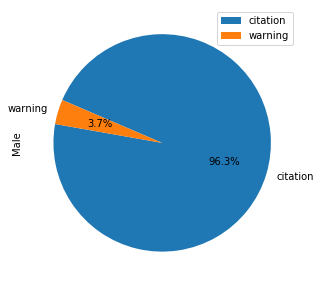

In [56]:
df_Male.plot.pie( subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170) #Erkek sürücülerden citiation ve warnin yüzdesi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3FE6DE88>],
      dtype=object)

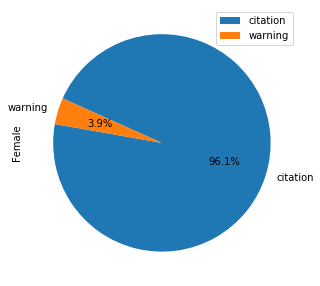

In [57]:
df_Female.plot.pie( subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

***

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [58]:
ri

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 11:30,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone X1
2005-01-04 12:55,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA
nan nan,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,True,NaN,NaN,False,Zone NA


In [59]:
ri["search_conducted"].dtype

dtype('O')

In [60]:
ri["search_conducted"]=ri["search_conducted"].astype(bool)

In [61]:
ri["search_conducted"].dtype

dtype('bool')

In [62]:
Counter(ri["search_conducted"])

Counter({False: 491909, True: 17772})

In [63]:
kadın_sürücü_counted = Counter(ri[ri["driver_gender"]=="F"]["search_conducted"])
kadın_sürücü_counted

Counter({False: 128679, True: 2459})

In [64]:
erkek_sürücü_counted = Counter(ri[ri["driver_gender"]=="M"]["search_conducted"])
erkek_sürücü_counted

Counter({False: 334143, True: 15303})

In [65]:
334143 + 128679

462822

In [66]:
15303+2459

17762

In [67]:
df_M_counted=pd.DataFrame({"M":[334143,15303], "F":[128679,2459]}, index=["Aranmıyan","Aranan"])
df_M_counted

,M,F
Aranmıyan,334143,128679
Aranan,15303,2459


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF447F1388>,
      dtype=object)

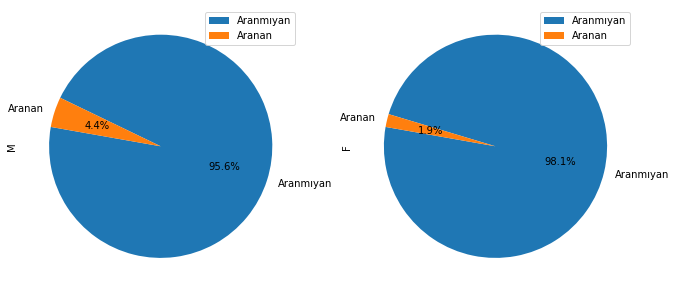

In [68]:
df_M_counted.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

In [69]:
Counter(ri["search_conducted"])

Counter({False: 491909, True: 17772})

In [70]:
search_conducted_toplam = pd.DataFrame({"search_conducted_toplam":[491909,17772]}, index = ["Aranmayan", "Aranan"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF4488E708>],
      dtype=object)

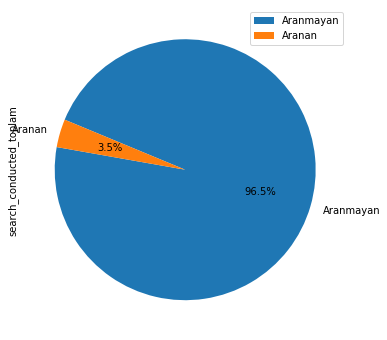

In [71]:
search_conducted_toplam.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [72]:
Counter(female["search_conducted"])# False = kadınlardan  aranmayanlar suclular

Counter({False: 128679, True: 2459})

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [73]:
Counter(male["search_conducted"]) # Ture = Erkeklerden arananlar suclular

Counter({False: 334143, True: 15303})

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [74]:
ri.groupby("driver_gender").sum()

,driver_age_raw,driver_age,search_conducted,contraband_found,is_arrested,drugs_related_stop
driver_gender,,,,,,
F,258875883.0,4256709.0,2459.0,831.0,3343.0,599.0
M,688133178.0,12018744.0,15303.0,5748.0,13260.0,4166.0


In [75]:
df_aranma_oranları = pd.DataFrame({"Arananlar":[15303, 2459]}, index = ["M","F"])
df_aranma_oranları

,Arananlar
M,15303
F,2459


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF44A3F288>],
      dtype=object)

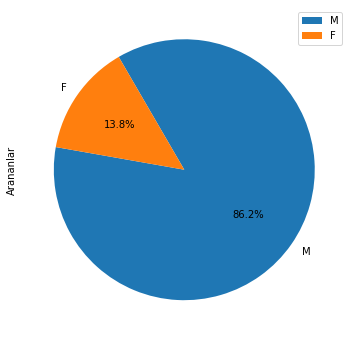

In [76]:

df_aranma_oranları.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

,violation
driver_gender,
F,131138
M,349446


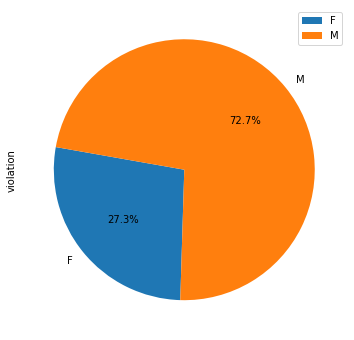

In [77]:
df_violation = ri.groupby("driver_gender")[["violation"]].count()
df_violation.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)
df_violation


**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [78]:
# anlamadım

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [79]:
ri["search_type"] = ri["search_type"].astype("str")

In [80]:
ri["search_type"].dtype

dtype('O')

In [81]:
range(0,100)

range(0, 100)

In [82]:
bos_list=[]
for j in range(0, len(ri["search_type"])):
    a = ri["search_type"][j].split(",")
    #bos_list.append(a)
    for k in range(0,len(a)):
        bos_list.append(a[k]) 

In [83]:
counter= Counter(bos_list)

In [84]:
counter

Counter({'nan': 491919,
         'Probable Cause': 6537,
         'Protective Frisk': 1598,
         'Incident to Arrest': 8759,
         'Reasonable Suspicion': 1715,
         'Inventory': 2214})

In [85]:
print(counter["Protective Frisk"])

1598


In [86]:
index =[]
for i in range(0, len(ri["search_type"])):
    if "Protective Frisk" in ri["search_type"][i]:
        index.append(i)
    

In [87]:
index[:5]

[10, 83, 252, 1026, 1120]

In [88]:
len(index)

1598

In [89]:
ri["frisk"]=False

In [90]:
for i in index:
    ri["frisk"][i] = True 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
ri["frisk"][1120]

True

In [92]:
ri["search_type"][1120]

'Protective Frisk'

In [93]:
ri["frisk"].dtype

dtype('bool')

In [94]:
sum(ri["frisk"])

1598

***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [95]:
ri[ri.search_conducted==True]# search_counted true olanlar

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32,RI-2005-00010,2005-01-24,20:32,Zone K1,600,M,1987.0,18.0,W,White,...,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,False
2005-02-09 03:05,RI-2005-00011,2005-02-09,03:05,Zone X4,500,M,1976.0,29.0,W,White,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00,RI-2005-00084,2005-08-28,01:00,Zone X1,0,M,1979.0,26.0,W,White,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-09-15 02:20,RI-2005-00094,2005-09-15,02:20,Zone X4,500,M,1988.0,17.0,W,White,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,False
2005-09-24 02:20,RI-2005-00115,2005-09-24,02:20,Zone K3,300,M,1987.0,18.0,W,White,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone K3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False
nan nan,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False
nan nan,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False


In [96]:
ri[ri.search_conducted==True].frisk # search_counted true olanlar dan friskin icindekiler 

stop_datetime
2005-01-24 20:32    False
2005-02-09 03:05     True
2005-08-28 01:00     True
2005-09-15 02:20    False
2005-09-24 02:20    False
                    ...  
nan nan             False
nan nan             False
nan nan             False
nan nan             False
nan nan             False
Name: frisk, Length: 17772, dtype: bool

In [97]:
Counter(ri.search_conducted==True)# aranan insan sayısı

Counter({False: 491909, True: 17772})

In [98]:
Counter(ri[ri.search_conducted==True].frisk) #aranıp ta s,lah tasıyanların icindeki dagılım

Counter({False: 16174, True: 1598})

In [99]:
frisk_True = ri[ri.search_conducted==True].groupby("driver_gender")[["frisk"]].sum() #true ları yani silahlı sayısını toplar
frisk_True

,frisk
driver_gender,
F,164.0
M,1434.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF511E5A88>],
      dtype=object)

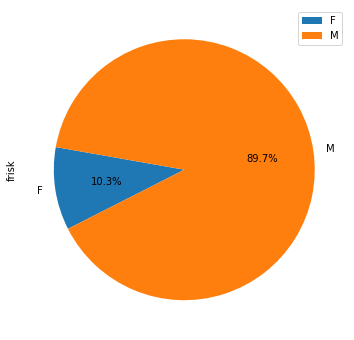

In [100]:
frisk_True.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

In [101]:
# frisk True olanlar yani silah tasıyanların dagılımı.(arama yapılıp ta silah bulunan surucular)

In [102]:
aranan_insan_sayısı = ri[ri.search_conducted==True].groupby("driver_gender")[["driver_gender"]].count()
aranan_insan_sayısı

,driver_gender
driver_gender,
F,2459
M,15303


In [103]:
arama_yapılan_silah_bulundurma_oranı=ri[ri.search_conducted==True].groupby("frisk")[["driver_gender"]].count()
arama_yapılan_silah_bulundurma_oranı

,driver_gender
frisk,
False,16164
True,1598


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF50F73A88>],
      dtype=object)

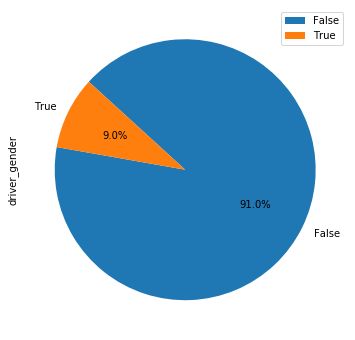

In [104]:
arama_yapılan_silah_bulundurma_oranı.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

In [105]:
# arama yapılan insanların % 9 u nda silah cıkmıs

In [106]:
pwd

'C:\\Users\\BİLGİSAYAR\\My works with Python\\Git-Hup\\My_projects\\clarusway-data-science-5-20-master\\clarusway-data-science-5-20-master\\1-projects\\EU1_DS_DAPy_M1'

In [109]:
ri

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,nan,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 11:30,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone X1,False
2005-01-04 12:55,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone X4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False
nan nan,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False
nan nan,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,False,NaN,True,NaN,NaN,False,Zone NA,False


In [ ]:
ri.to_csv("police.csv_2.jptr sonu.csv")

In [108]:
2+2+1

5